# General Preamble Code

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Additional Import Code for dataset W

In [6]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets['quality']

In [7]:
print("Features (x):")
display(x)
print("\nTarget (y):")
display(y)

Features (x):


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8



Target (y):


0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

# Question 1
## Run a linear regression on the entire wine dataset. Measure R-squared on both the training and test data sets. Also evaluate the resulting MSE and RMSE. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("############ Assignment 2 Question 1 BEGIN ############")
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"MSE (train): {mse_train:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print("############# Assignment 2 Question 1 END #############")

############ Assignment 2 Question 1 BEGIN ############
R^2 (train): 0.2925
R^2 (test): 0.2900
MSE (train): 0.5338
MSE (test): 0.5582
RMSE (train): 0.7306
RMSE (test): 0.7471
############# Assignment 2 Question 1 END #############


# Question 2
## Now categorize “good wines” as those securing a score of 7 or higher. All other wines are “bad wines”. Run a logistic regression to see whether you can predict good wines. Evaluate this model with a visualized confusion matrix, and an accuracy score.

############ Assignment 2 Question 2 BEGIN ############


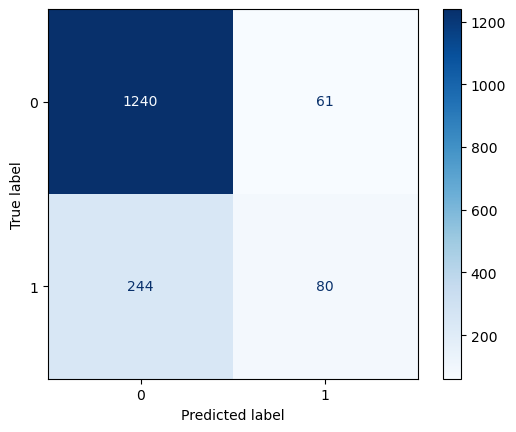

Accuracy: 0.8123
############# Assignment 2 Question 2 END #############


In [11]:
print("############ Assignment 2 Question 2 BEGIN ############")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# labeling 1 for good wine (quality >= 7) and 0 otherwise
y_bin = (y >= 7).astype(int)
y_train_bin = y_bin[y_train.index]
y_test_bin = y_bin[y_test.index]

# fit logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(x_train, y_train_bin)
y_pred = logreg.predict(x_test)

# confusion matrix and accuracy
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

acc = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {acc:.4f}")
print("############# Assignment 2 Question 2 END #############")

# Question 3
## Why doesn’t the number of wines in the confusion matrix add up to the total number of wines in the original dataset?

In [13]:
print("############ Assignment 2 Question 3 BEGIN ############")
print(f"Total wines in original dataset: {len(y)}")
print(f"Total wines in confusion matrix (test set): {cm.sum()}")

print(
    "The confusion matrix only counts wines in the test set, not the whole dataset. "
    "This is because the data was split into training and test sets, so only the test set predictions are shown in the confusion matrix."
)
print("############# Assignment 2 Question 3 END #############")

############ Assignment 2 Question 3 BEGIN ############
Total wines in original dataset: 6497
Total wines in confusion matrix (test set): 1625
The confusion matrix only counts wines in the test set, not the whole dataset. This is because the data was split into training and test sets, so only the test set predictions are shown in the confusion matrix.
############# Assignment 2 Question 3 END #############


# Question 4
## Repeat 1 and 2 for just the red wine and white wine datasets. Report your findings and remark on why this did or didn’t improve the evaluation results.

############ Assignment 2 Question 4 BEGIN ############
Linear regression
red
R^2 (train): 0.3433
R^2 (test): 0.3331
MSE (train): 0.4368
MSE (test): 0.4076
RMSE (train): 0.6609
RMSE (test): 0.6384

Linear regression
white
R^2 (train): 0.2741
R^2 (test): 0.2388
MSE (train): 0.5556
MSE (test): 0.6371
RMSE (train): 0.7454
RMSE (test): 0.7982

Logistic regression w/ good and bad wine
red


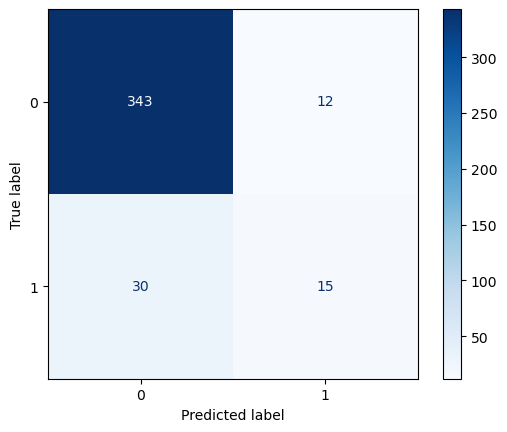

Accuracy: 0.8950
Logistic regression w/ good and bad wine
white


D:\Users\16697\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


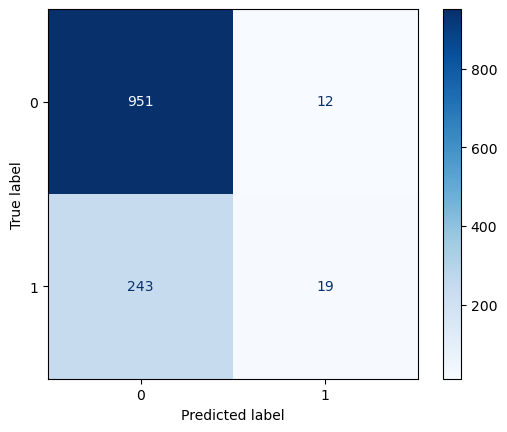

Accuracy: 0.7918

It can be observed that splitting the data between red and white wine leads to different results for both questions one and two.
This improves evaluation results because there may be different patterns in the data for red and white wine. Splitting the data better allows the model to capture the underlying trends.
The evaluation results improved for red wines but not for white wines because...

############# Assignment 2 Question 4 END #############


In [15]:
print("############ Assignment 2 Question 4 BEGIN ############")
# split dataset by color
red_data = wine_quality.data.original['color'] == 'red'
white_data = wine_quality.data.original['color'] == 'white'

x_red = x[red_data]
y_red = y[red_data]
x_white = x[white_data]
y_white = y[white_data]

print ("Linear regression")
print ("red")
xr_tr, xr_te, yr_tr, yr_te = train_test_split(x_red, y_red, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lrr = LinearRegression()
lrr.fit(xr_tr, yr_tr)
yr_tr_pred = lr.predict(xr_tr)
yr_te_pred = lr.predict(xr_te)
r2r_tr = r2_score(yr_tr, yr_tr_pred)
r2r_te = r2_score(yr_te, yr_te_pred)
mser_tr = mean_squared_error(yr_tr, yr_tr_pred)
mser_te = mean_squared_error(yr_te, yr_te_pred)
rmser_tr = np.sqrt(mser_tr)
rmser_te = np.sqrt(mser_te)

print(f"R^2 (train): {r2r_tr:.4f}")
print(f"R^2 (test): {r2r_te:.4f}")
print(f"MSE (train): {mser_tr:.4f}")
print(f"MSE (test): {mser_te:.4f}")
print(f"RMSE (train): {rmser_tr:.4f}")
print(f"RMSE (test): {rmser_te:.4f}")

print()
print("Linear regression")
print("white")
xw_tr, xw_te, yw_tr, yw_te = train_test_split(x_white, y_white, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lrw = LinearRegression()
lrw.fit(xw_tr, yw_tr)
yw_tr_pred = lr.predict(xw_tr)
yw_te_pred = lr.predict(xw_te)
r2w_tr = r2_score(yw_tr, yw_tr_pred)
r2w_te = r2_score(yw_te, yw_te_pred)
msew_tr = mean_squared_error(yw_tr, yw_tr_pred)
msew_te = mean_squared_error(yw_te, yw_te_pred)
rmsew_tr = np.sqrt(msew_tr)
rmsew_te = np.sqrt(msew_te)

print(f"R^2 (train): {r2w_tr:.4f}")
print(f"R^2 (test): {r2w_te:.4f}")
print(f"MSE (train): {msew_tr:.4f}")
print(f"MSE (test): {msew_te:.4f}")
print(f"RMSE (train): {rmsew_tr:.4f}")
print(f"RMSE (test): {rmsew_te:.4f}")

print()
print ("Logistic regression w/ good and bad wine")
print ("red")
# labeling 1 for good wine (quality >= 7) and 0 otherwise
yr_bin = (y >= 7).astype(int)
yr_train_bin = yr_bin[yr_tr.index]
yr_test_bin = yr_bin[yr_te.index]
# fit logistic regression
logregr = LogisticRegression(max_iter=1000, random_state=0)
logregr.fit(xr_tr, yr_train_bin)
yr_pred = logregr.predict(xr_te)

# confusion matrix and accuracy
cm = confusion_matrix(yr_test_bin, yr_pred)
dispr = ConfusionMatrixDisplay(confusion_matrix=cm)
dispr.plot(cmap='Blues')
plt.show()

acc = accuracy_score(yr_test_bin, yr_pred)
print(f"Accuracy: {acc:.4f}")

print("Logistic regression w/ good and bad wine")
print ("white")
# labeling 1 for good wine (quality >= 7) and 0 otherwise
yw_bin = (y >= 7).astype(int)
yw_train_bin = yw_bin[yw_tr.index]
yw_test_bin = yw_bin[yw_te.index]
# fit logistic regression
logregw = LogisticRegression(max_iter=1000, random_state=0)
logregw.fit(xw_tr, yw_train_bin)
yw_pred = logregr.predict(xw_te)

# confusion matrix and accuracy
cm = confusion_matrix(yw_test_bin, yw_pred)
dispr = ConfusionMatrixDisplay(confusion_matrix=cm)
dispr.plot(cmap='Blues')
plt.show()

acc = accuracy_score(yw_test_bin, yw_pred)
print(f"Accuracy: {acc:.4f}")

print()
print("It can be observed that splitting the data between red and white wine leads to different results for both questions one and two.")
print("This improves evaluation results because there may be different patterns in the data for red and white wine. Splitting the data better allows the model to capture the underlying trends.")
print("The evaluation results improved for red wines but not for white wines because...")
print()

print("############# Assignment 2 Question 4 END #############")

# Question 5
## Now add “color” as an independent variable (a feature) into the linear regression and rerun the model. What encoding choice did you use for this feature? Evaluate the new model and compare it to the baseline you have in (1). Did it show an improvement? If so, was it as big as the improvement in (4) where you split the data set by colors? If not, why not?

In [68]:
print("############ Assignment 2 Question 5 BEGIN ############")
color_dummies = pd.get_dummies(wine_quality.data.original['color'], prefix='color')
color_dummies.drop(columns='color_white', inplace=True)
encode_x = pd.concat([x, color_dummies.astype(int)], axis=1)

# split data into test and train
ex_train, ex_test, ey_train, ey_test = train_test_split(encode_x, y, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lr = LinearRegression()
lr.fit(ex_train, ey_train)
ey_train_pred = lr.predict(ex_train)
ey_test_pred = lr.predict(ex_test)
er2_train = r2_score(ey_train, ey_train_pred)
er2_test = r2_score(ey_test, ey_test_pred)
emse_train = mean_squared_error(ey_train, ey_train_pred)
emse_test = mean_squared_error(ey_test, ey_test_pred)
ermse_train = np.sqrt(emse_train)
ermse_test = np.sqrt(emse_test)

print(f"R^2 (train): {er2_train:.4f}")
print(f"R^2 (test): {er2_test:.4f}")
print(f"MSE (train): {emse_train:.4f}")
print(f"MSE (test): {emse_test:.4f}")
print(f"RMSE (train): {ermse_train:.4f}")
print(f"RMSE (test): {ermse_test:.4f}")

print()
print("The new model did improve over the baseline results from Q1, but it was not as big of an improvement as Q4 where data was split by color.")
print("TO BE ANSWERED: WHY?")
print("############# Assignment 2 Question 5 END #############")

############ Assignment 2 Question 5 BEGIN ############
R^2 (train): 0.2965
R^2 (test): 0.2955
MSE (train): 0.5309
MSE (test): 0.5538
RMSE (train): 0.7286
RMSE (test): 0.7442

The new model did improve over the baseline results from Q1, but it was not as big of an improvement as Q4 where data was split by color.
TO BE ANSWERED: WHY?
############# Assignment 2 Question 5 END #############


# Question 6
## When you transformed “quality score” for the logistic regression in (2), what kind of variable-type transformation did you perform?

In [ ]:
print("############ Assignment 2 Question 6 BEGIN ############")

print("############# Assignment 2 Question 6 END #############")

# Question 7
## We will now rerun the KNN-Classifier from Lab 1 (Question 1) and the Logistic Regression from Lab 2 (Question 2) with feature scaling. Use the MinMaxScaler to scale all 11 features. Now compare the results with feature scaling and without from Lab 1 Q1, and Lab 2 Q2. What differences in accuracy do you see? What explains this?

In [ ]:
print("############ Assignment 2 Question 7 BEGIN ############")

print("############# Assignment 2 Question 7 END #############")